# **Fast tag Fraud Detection**





1. **Transaction_ID**: Unique identifier for each transaction.
2. **Timestamp**: Date and time of the transaction.
3. **Vehicle_Type**: Type of vehicle involved in the transaction.
4. **FastagID**: Unique identifier for Fastag.
5. **TollBoothID**: Identifier for the toll booth.
6. **Lane_Type**: Type of lane used for the transaction.
7. **Vehicle_Dimensions**: Dimensions of the vehicle.
8. **Transaction_Amount**: Amount associated with the transaction.
9. **Amount_paid**: Amount paid for the transaction.
10. **Geographical_Location**: Location details of the transaction.
11. **Vehicle_Speed**: Speed of the vehicle during the transaction.
12. **Vehicle_Plate_Number**: License plate number of the vehicle.
13. **Fraud_indicator**: Binary indicator of fraudulent activity (target variable).

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/FastagFraudDetection.csv')
df.head(5)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [ ]:
df.shape

(5000, 13)

In [ ]:
df.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [ ]:
df.nunique()

Transaction_ID           5000
Timestamp                4423
Vehicle_Type                7
FastagID                 4451
TollBoothID                 6
Lane_Type                   2
Vehicle_Dimensions          3
Transaction_Amount         20
Amount_paid                23
Geographical_Location       5
Vehicle_Speed              85
Vehicle_Plate_Number     5000
Fraud_indicator             2
dtype: int64

In [ ]:
df.isna().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [ ]:
df.columns

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')

In [ ]:
df['Fraud_indicator'].value_counts()

Not Fraud    4017
Fraud         983
Name: Fraud_indicator, dtype: int64

<ipython-input-10-18e614bb6d64>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Transaction_ID', y='TollBoothID', inner='box', palette='Dark2')


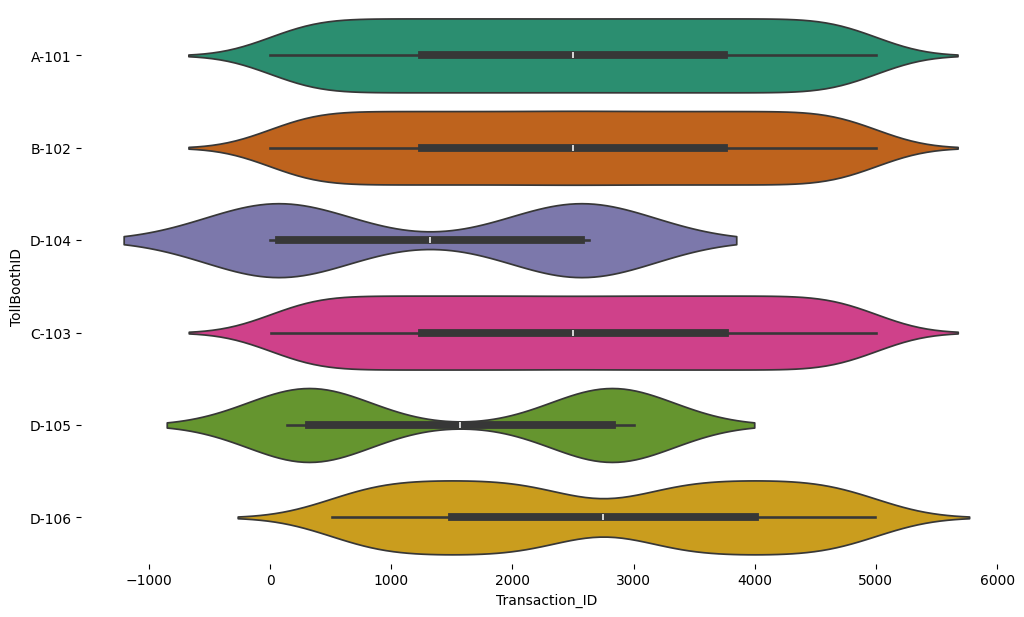

In [ ]:
figsize = (12, 1.2 * len(df['TollBoothID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Transaction_ID', y='TollBoothID', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

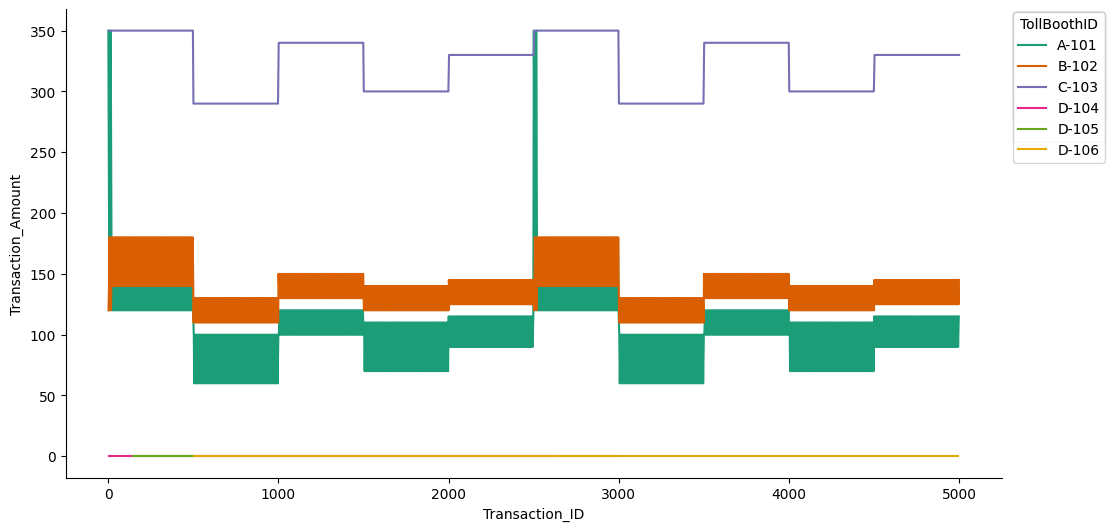

In [ ]:
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Transaction_ID']
  ys = series['Transaction_Amount']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Transaction_ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('TollBoothID')):
  _plot_series(series, series_name, i)
  fig.legend(title='TollBoothID', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Transaction_ID')
_ = plt.ylabel('Transaction_Amount')

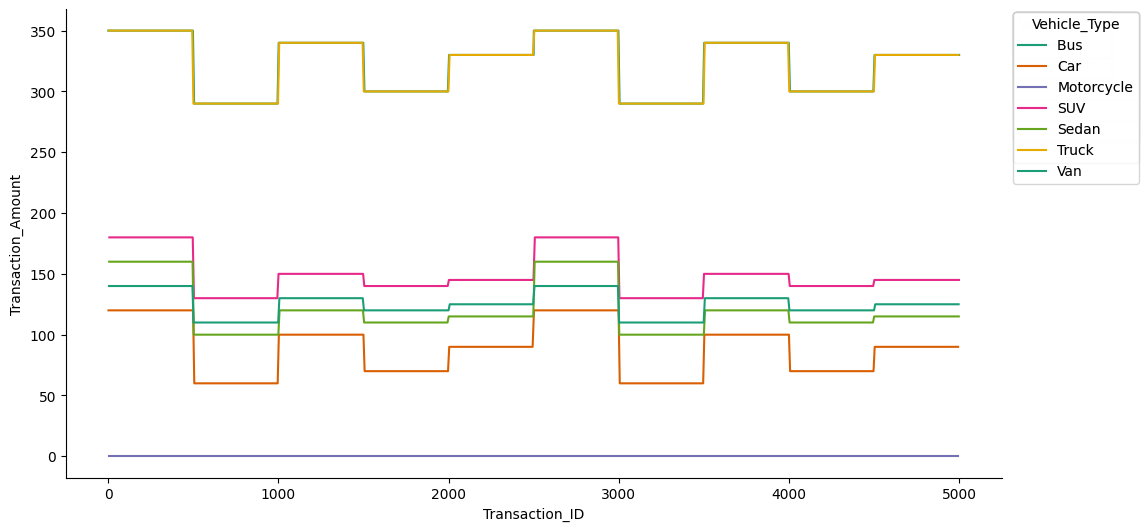

In [ ]:
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Transaction_ID']
  ys = series['Transaction_Amount']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Transaction_ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Vehicle_Type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Vehicle_Type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Transaction_ID')
_ = plt.ylabel('Transaction_Amount')

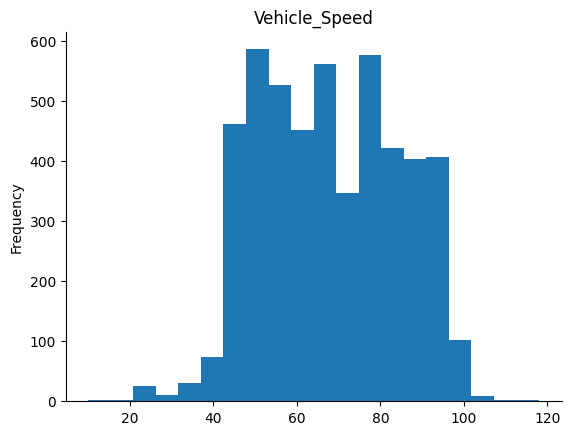

In [ ]:
df['Vehicle_Speed'].plot(kind='hist', bins=20, title='Vehicle_Speed')
plt.gca().spines[['top', 'right',]].set_visible(False)

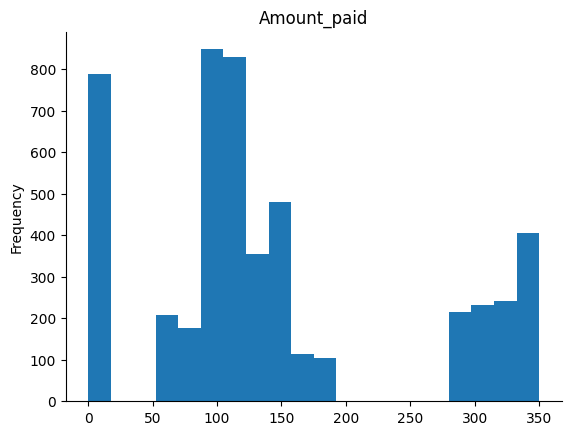

In [ ]:
df['Amount_paid'].plot(kind='hist', bins=20, title='Amount_paid')
plt.gca().spines[['top', 'right',]].set_visible(False)

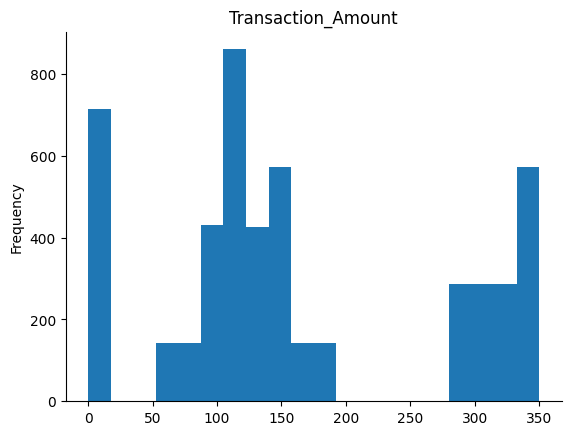

In [ ]:
df['Transaction_Amount'].plot(kind='hist', bins=20, title='Transaction_Amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
fig = px.imshow(df.corr(), labels=dict(color="Correlation"), x=df.corr().columns, y=df.corr().columns)
fig.update_layout(title="Correlation Heatmap")
fig.show()

<ipython-input-16-19c60310808b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fig = px.imshow(df.corr(), labels=dict(color="Correlation"), x=df.corr().columns, y=df.corr().columns)


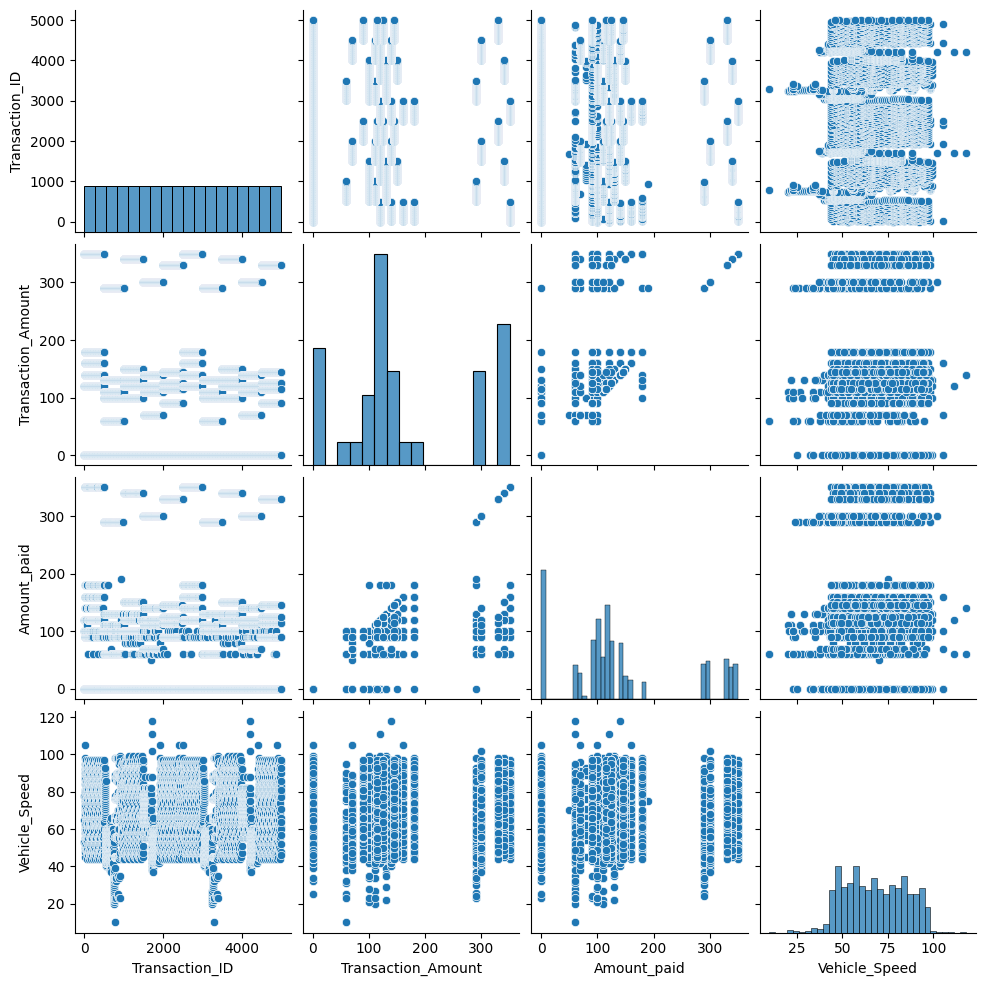

In [ ]:
sns.pairplot(df)

In [ ]:
df=df.drop(columns=['Timestamp','Transaction_ID','Vehicle_Plate_Number','Geographical_Location','Vehicle_Dimensions','FastagID'] , axis=1)

In [ ]:


from sklearn.preprocessing import LabelEncoder
le=LabelEncoder ()
df['Fraud_indicator']= le.fit_transform(df['Fraud_indicator'])
df['Vehicle_Type']= le.fit_transform(df['Vehicle_Type'])
df[ 'Lane_Type']= le.fit_transform(df[ 'Lane_Type'])
df[ 'TollBoothID']= le.fit_transform(df[ 'TollBoothID'])

X=df.drop(columns=['Fraud_indicator'])
Y= df['Fraud_indicator']
X_train , X_test , Y_train , Y_test = train_test_split(X,Y , test_size=0.40)

In [ ]:
print("-------------------------Model 1 Logistic R-----------------------")
lr = LogisticRegression(solver='saga')

lr.fit(X_train, Y_train)

print("Accuracy: ", lr.score(X_test, Y_test) * 100)

expected = Y
predicted = lr.predict(X)
print(classification_report(expected, predicted))
print(confusion_matrix(expected, predicted))

-------------------------Model 1 Logistic R-----------------------
Accuracy:  98.4
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       983
           1       0.98      1.00      0.99      4017

    accuracy                           0.99      5000
   macro avg       0.99      0.96      0.98      5000
weighted avg       0.99      0.99      0.99      5000

[[ 914   69]
 [   0 4017]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [ ]:
print("-------------------------Model 2 Random Forest -----------------------")

forest = RandomForestClassifier()
forest.fit(X, Y)
print("Score : ",forest.score(X, Y)*100 , "%")

expected = Y
predicted = forest.predict(X)
print(classification_report(expected, predicted))
print(confusion_matrix(expected, predicted))

-------------------------Model 2 Random Forest -----------------------
Score :  100.0 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       983
           1       1.00      1.00      1.00      4017

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000

[[ 983    0]
 [   0 4017]]


In [ ]:
print("-------------------------Model 3 SVM-----------------------")

svm = SVC(kernel='linear')
svm.fit(X_train, Y_train)
Y_pred = svm.predict(X_test)

print("Score :", (accuracy_score(Y_test, Y_pred))*100,"%")

expected = Y
predicted = svm.predict(X)
print(classification_report(expected, predicted))
print(confusion_matrix(expected, predicted))

-------------------------Model 3 SVM-----------------------
Score : 98.7 %
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       983
           1       0.99      1.00      0.99      4017

    accuracy                           0.99      5000
   macro avg       0.99      0.97      0.98      5000
weighted avg       0.99      0.99      0.99      5000

[[ 933   50]
 [   0 4017]]
